In [ ]:
# Flower classification

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns
import os
import cv2
import PIL

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = keras.utils.get_file('flower_photos', origin = data_url, cache_dir= '.', untar = True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib  # used to read images and store the images into numpy array

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
image_count = list(data_dir.glob('*\*.jpg'))
len(image_count)

3670

In [7]:
# to get the rose images

roses = list(data_dir.glob('roses/*'))
print(len(roses))
roses[:5]

641


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

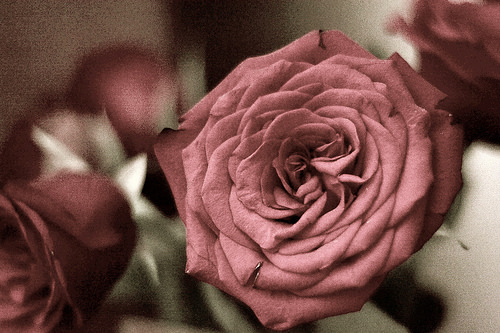

In [8]:
PIL.Image.open(str(roses[12]))

In [9]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:3]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg')]

In [11]:
str(tulips[3])

'datasets\\flower_photos\\tulips\\10128546863_8de70c610d.jpg'

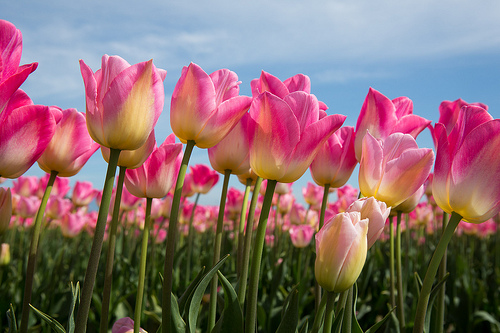

In [14]:
PIL.Image.open(str(tulips[3]))

In [15]:
flower_image_dic = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [16]:
flower_image_label = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [17]:
flower_image_dic['roses'][1]

WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')

In [18]:
# cv2 can't understand WindowsPath so have to convert into str

str(flower_image_dic['roses'][1])

'datasets\\flower_photos\\roses\\102501987_3cdb8e5394_n.jpg'

In [20]:
img = cv2.imread(str(flower_image_dic['roses'][1]))

img

array([[[10, 16, 15],
        [17, 22, 21],
        [15, 17, 17],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[15, 21, 20],
        [ 9, 14, 13],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[16, 22, 21],
        [ 7, 12, 11],
        [ 0,  5,  4],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 0,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  1,  1],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 1,  3,  3],
        [ 0,  2,  2],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 3,  5,  5],
        [ 3,  5,  5],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 1,  3,  3],
        [ 1,  3,  3]]], dtype=uint8)

In [18]:
img.shape

(240, 320, 3)

In [21]:
# cv2 can also resize the shape of the images

cv2.resize(img, (224,224)).shape

(224, 224, 3)

In [22]:
x, y = [], []

for flower_name, images in flower_image_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (224, 224))
        x.append(resize_img)
        y.append(flower_image_label[flower_name])

In [23]:
x[0].shape

(224, 224, 3)

In [24]:
y[:2]

[0, 0]

In [25]:
x[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [26]:
import numpy as np

x = np.array(x)
y = np.array(y)

In [27]:
x[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [29]:
# for Image classification.. always do slacing fot the RGB channel(lies between 0 and 255)

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [30]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(5, activation = 'softmax')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs= 5)

Epoch 1/5
92/92 [==============================] - 106s 1s/step - loss: 1.4892 - accuracy: 0.4782
Epoch 2/5
92/92 [==============================] - 98s 1s/step - loss: 0.9131 - accuracy: 0.6577
Epoch 3/5
92/92 [==============================] - 99s 1s/step - loss: 0.5437 - accuracy: 0.8086
Epoch 4/5
92/92 [==============================] - 99s 1s/step - loss: 0.2533 - accuracy: 0.9135
Epoch 5/5
92/92 [==============================] - 99s 1s/step - loss: 0.1040 - accuracy: 0.9710


In [32]:
model.evaluate(x_test_scaled, y_test)  # result as overfitting

23/23 [==============================] - 6s 280ms/step - loss: 1.7392 - accuracy: 0.6117


[1.7391598224639893, 0.611716628074646]

In [33]:
# using dropout : Regularization

dropout_model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation = 'softmax')
])

dropout_model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

dropout_model.fit(x_train_scaled, y_train, epochs= 5)

Epoch 1/5
92/92 [==============================] - 112s 1s/step - loss: 1.7351 - accuracy: 0.3253
Epoch 2/5
92/92 [==============================] - 98s 1s/step - loss: 1.3874 - accuracy: 0.4091
Epoch 3/5
92/92 [==============================] - 98s 1s/step - loss: 1.2437 - accuracy: 0.4891
Epoch 4/5
92/92 [==============================] - 100s 1s/step - loss: 1.0533 - accuracy: 0.5773
Epoch 5/5
92/92 [==============================] - 98s 1s/step - loss: 0.8705 - accuracy: 0.6574


In [34]:
dropout_model.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 7s 295ms/step - loss: 1.1671 - accuracy: 0.5831


[1.1670825481414795, 0.583106279373169]

In [ ]:
# Implementing using transfer learning

In [35]:
feature_extracted_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [36]:
import tensorflow_hub as hub

pre_trained_model_without_top_layer = hub.KerasLayer(feature_extracted_model, input_shape = (224,224,3), trainable = False)

In [37]:
transfer_model = tf.keras.Sequential([
    pre_trained_model_without_top_layer, 
    tf.keras.layers.Dense(5)
])

transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
transfer_model.compile(
        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['accuracy']
)

transfer_model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 67s 670ms/step - loss: 0.8215 - accuracy: 0.6894
Epoch 2/5
92/92 [==============================] - 61s 661ms/step - loss: 0.4119 - accuracy: 0.8539
Epoch 3/5
92/92 [==============================] - 62s 671ms/step - loss: 0.3203 - accuracy: 0.8900
Epoch 4/5
92/92 [==============================] - 61s 665ms/step - loss: 0.2669 - accuracy: 0.9138
Epoch 5/5
92/92 [==============================] - 62s 671ms/step - loss: 0.2302 - accuracy: 0.9319


In [39]:
transfer_model.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 16s 671ms/step - loss: 0.4042 - accuracy: 0.8692


[0.4041782021522522, 0.8692098259925842]